In [1]:
import celebA_dataloader
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import sys
import argparse
import math
import random


/home/disk/qij/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


28 40


In [2]:
from types import SimpleNamespace

args = SimpleNamespace(
    dataroot = '/home/disk/qij/celeba',
    batch_size = 128,
    img_size = 224,
    workers = 8,
    device = 'cuda:1',
    num_concepts = 6,
    num_hidden = 2,
    seed = 42,
    subsample = 12
)

In [3]:
dataloaders, concept_names = celebA_dataloader.load_data(args)
print(dataloaders, concept_names)
train_iterator = iter(dataloaders['train'])
batch = next(train_iterator)

Seed set to 42


Files already downloaded and verified
[2, 21, 31, 36, 19, 20, 18, 33, 25, 27, 1, 6, 8, 7, 39, 32, 11, 3, 34, 24, 5, 9, 12, 37, 23, 0, 28, 38, 29, 15, 16, 13, 30, 10, 35, 14, 26, 17, 22, 4] 
 [0.512505   0.48342786 0.48208037 0.4724357  0.45503186 0.41675428
 0.38692195 0.31956722 0.28414257 0.27744461 0.26698059 0.24079586
 0.23925093 0.23453225 0.77361685 0.20840182 0.20519351 0.20457159
 0.18892492 0.83493996 0.15157528 0.14799185 0.14216753 0.12296704
 0.11514864 0.11113579 0.07977828 0.07271507 0.06572096 0.06511878
 0.06276438 0.05756692 0.05651064 0.05089857 0.04846026 0.04668829
 0.0429469  0.04194986 0.04154512 0.02244335]
concepts [2, 19, 20, 21, 31, 36] ['Attractive', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Smiling', 'Wearing_Lipstick']
hidden concepts [18, 33] ['Heavy_Makeup', 'Wavy_Hair']
data[0] (tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  0.9765,  0.9529,  0.9529],
         [ 1.0000,  1.0000,  1.0000,  ...,  0.9686,  0.9373,  0.9373],
         [ 1.0000,  1.0000

In [4]:
print(batch[0], batch[1][0], batch[1][1])

tensor([[[[-0.4039, -0.4275, -0.4667,  ..., -0.2471, -0.2392, -0.2392],
          [-0.4118, -0.4275, -0.4510,  ..., -0.2392, -0.2235, -0.2235],
          [-0.4118, -0.4275, -0.4353,  ..., -0.2235, -0.2078, -0.2078],
          ...,
          [-0.7255, -0.7804, -0.8275,  ..., -0.1373, -0.1059, -0.1059],
          [-0.7098, -0.7725, -0.8196,  ..., -0.1137, -0.0824, -0.0824],
          [-0.7020, -0.7647, -0.8039,  ..., -0.0667, -0.0588, -0.0588]],

         [[-0.5608, -0.5843, -0.6235,  ..., -0.4196, -0.4118, -0.4118],
          [-0.5686, -0.5843, -0.6078,  ..., -0.4118, -0.3961, -0.3961],
          [-0.5686, -0.5843, -0.5922,  ..., -0.3961, -0.3804, -0.3804],
          ...,
          [-0.7333, -0.7882, -0.8353,  ..., -0.2078, -0.1608, -0.1608],
          [-0.7176, -0.7804, -0.8275,  ..., -0.1765, -0.1451, -0.1451],
          [-0.7098, -0.7725, -0.8118,  ..., -0.1294, -0.1294, -0.1294]],

         [[-0.6314, -0.6627, -0.7098,  ..., -0.5294, -0.5216, -0.5216],
          [-0.6392, -0.6549, -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


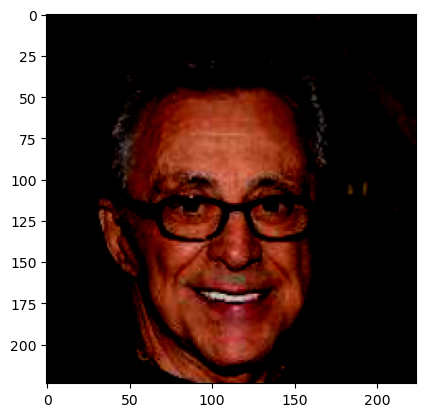

In [5]:
img = batch[0][0]
print(img.shape)
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [ ]:
print(celeb_train_dataset[0][1])